In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [77]:
import warnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4', quiet=True)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

In [78]:
reviews_data = pd.read_csv('/Users/lengocbinh/Documents/2023.1/Intro to Data Science/Capstone project/Intro-to-Data-Science/dataset/reviews_data.csv')
reviews_data = reviews_data.drop('Unnamed: 0', axis=1)
reviews_data.head(10)

,rating,review,movie_name,sentiment
0,10,I want see film moment I see snippet bbc ameri...,Khách Sạn Rwanda,1
1,10,call common sense human heart like challenge m...,Oldboy: Báo Thù,1
2,10,george miller masterpiece mad maxfury road def...,Max Điên: Con Đường Tử Thần,1
3,10,one early historical epic set still current wa...,Trái Tim Dũng Cảm,1
4,10,music ban miguel household musical great grand...,Coco: Hội Ngộ Diệu Kỳ,1
5,2,quite great year ago I see first time well lea...,Return to the Blue Lagoon,0
6,2,I keep wait movie something earn high praise I...,Hồi Ức Kẻ Sát Nhân,0
7,1,pathetic life odd outcast bad way rather way w...,Mary Và Max,0
8,10,logan paul dice esta pelicula es increible,Max Steel,1
9,1,fast clever scary horror thing overrated movie...,Quái Vật Biến Hình,0


In [79]:
details_data = pd.read_csv('/Users/lengocbinh/Documents/2023.1/Intro to Data Science/Capstone project/Intro-to-Data-Science/dataset/details_data.csv')
details_data = details_data.drop('Unnamed: 0', axis=1)
details_data.head(10)

,movie_name,movie_duration,movie_genre,movie_director,movie_release_year
0,Nhà tù Shawshank,142.0,Drama,Frank Darabont,1994.0
1,Bố Già,175.0,Crime,Francis Ford Coppola,1972.0
2,Kỵ Sĩ Bóng Đêm,152.0,Action,Christopher Nolan,2008.0
3,Bố Già Phần II,202.0,Crime,Francis Ford Coppola,1974.0
4,12 Người Đàn Ông Giận Dữ,96.0,Crime,Sidney Lumet,1957.0
5,Bản Danh Sách Của Schindler,195.0,Biography,Steven Spielberg,1993.0
6,Chúa Tể Của Những Chiếc Nhẫn: Sự Quay Trở Lại ...,201.0,Action,Peter Jackson,2003.0
7,Chuyện Tào Lao,154.0,Crime,Quentin Tarantino,1994.0
8,Chúa Tể Của Những Chiếc Nhẫn: Những Người Bạn ...,178.0,Action,Peter Jackson,2001.0
9,"Thiện, Ác, Tà",161.0,Adventure,Sergio Leone,1966.0


In [80]:
data = pd.merge(reviews_data, details_data, on='movie_name', how='left')
data.head()

,rating,review,movie_name,sentiment,movie_duration,movie_genre,movie_director,movie_release_year
0,10,I want see film moment I see snippet bbc ameri...,Khách Sạn Rwanda,1,121.0,Biography,Terry George,2004.0
1,10,call common sense human heart like challenge m...,Oldboy: Báo Thù,1,120.0,Action,Park Chan-wook,2003.0
2,10,george miller masterpiece mad maxfury road def...,Max Điên: Con Đường Tử Thần,1,120.0,Action,George Miller,2015.0
3,10,one early historical epic set still current wa...,Trái Tim Dũng Cảm,1,178.0,Biography,Mel Gibson,1995.0
4,10,music ban miguel household musical great grand...,Coco: Hội Ngộ Diệu Kỳ,1,105.0,Animation,Lee Unkrich,2017.0


## Univariate Non-graphical

### 1. Ratings

#### 1.1. QUANTIFY HOW SPREAD OUT THE DATA ARE

In [81]:
mean_rating = data['rating'].mean()
median_rating = data['rating'].median()
min_rating = data['rating'].min()
max_rating = data['rating'].max()

std_dev_rating = data['rating'].std()


# Display the results
print(f"Mean Rating: {mean_rating:.2f}")
print(f"Median Rating: {median_rating}")
print(f"Minimum Rating: {min_rating}")
print(f"Maximum Rating: {max_rating}")
print(f"Standard Deviation of Ratings: {std_dev_rating:.2f}")

Mean Rating: 6.27
Median Rating: 8.0
Minimum Rating: 0
Maximum Rating: 10
Standard Deviation of Ratings: 4.00


#### 1.2. Identify any extreme values that may be considered outliers

In [82]:
Q1 = data['rating'].quantile(0.25)
Q3 = data['rating'].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers
outlier_threshold = 0.1

# Identify outliers using the IQR method
low_ratings = data[(data['rating'] < (Q1 - outlier_threshold * IQR))] 
high_ratings = data[(data['rating'] > (Q3 + outlier_threshold * IQR))]

# Display the results
print("Reviews with Exceptionally High Ratings:")
high_ratings

print("\nReviews with Exceptionally Low Ratings:")
low_ratings

Reviews with Exceptionally High Ratings:

Reviews with Exceptionally Low Ratings:


,rating,review,movie_name,sentiment,movie_duration,movie_genre,movie_director,movie_release_year
7,1,pathetic life odd outcast bad way rather way w...,Mary Và Max,0,92.0,Animation,Adam Elliot,2009.0
9,1,fast clever scary horror thing overrated movie...,Quái Vật Biến Hình,0,109.0,Horror,John Carpenter,1982.0
20,0,bad emotional connection vfx bad,Leave No Trace,0,108.0,Drama,DebraGranik,2018.0
21,1,I hate movie I hate everything,Vẻ Đẹp Mỹ,0,122.0,Drama,Sam Mendes,1999.0
25,0,like I know last summer japanese relative stil...,One Missed Call,0,87.0,Horror,ÉricValette,2008.0
...,...,...,...,...,...,...,...,...
17360,1,I little dad read book sister absolutely love ...,Phù Thủy Xứ Oz,0,102.0,Adventure,Victor Fleming,1939.0
17363,1,change religion real anthony sami film base re...,Jai Bhim,0,164.0,Crime,T.J. Gnanavel,2021.0
17370,1,tarantino continue make idiotic cartoon good g...,Định Mệnh,0,153.0,Adventure,Quentin Tarantino,2009.0
17375,1,I get treasure everybody people always say ama...,Phù Thủy Xứ Oz,0,102.0,Adventure,Victor Fleming,1939.0


### 2. Multivariate Non-graphical

#### 2.1. rating & movie_duration

In [83]:
data = data.dropna(subset=['rating', 'movie_duration'])

In [84]:
data['rating'] = pd.to_numeric(data['rating'], errors='coerce')
data['movie_duration'] = pd.to_numeric(data['movie_duration'], errors='coerce')

- Slope: Indicates the change in 'Duration' for a one-unit change in 'Rating'.
- Intercept: Represents the predicted 'Duration' when 'Rating' is zero.
- R-squared: Represents the proportion of the variance in 'Duration' explained by 'Rating'. A higher R-squared indicates a better fit.
- p-value: Indicates the statistical significance of the relationship. A small p-value suggests a significant relationship.

In [85]:
unique_ratings = data['rating'].nunique()
unique_durations = data['movie_duration'].nunique()

if unique_ratings < 2 or unique_durations < 2:
    print("Insufficient variability in the data.")
else:
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(data['rating'], data['movie_duration'])
    print(f"Linear Regression Results:")
    print(f"  Slope: {slope:.2f}")
    print(f"  Intercept: {intercept:.2f}")
    print(f"  R-squared: {r_value**2:.2f}")
    print(f"  p-value: {p_value:.4f}")


Linear Regression Results:
  Slope: -0.37
  Intercept: 120.58
  R-squared: 0.00
  p-value: 0.0000


#### 2.2. rating vs director

In [86]:
director_stats = data.groupby('movie_director')['rating'].agg(['mean', 'median', 'std', 'count'])
director_stats_sorted = director_stats.sort_values(by=['mean','count'], ascending=False)

# Display the results
print("Summary Statistics for Ratings by Director:")
print(director_stats_sorted)

Summary Statistics for Ratings by Director:
                     mean  median       std  count
movie_director                                    
SashaNeulinger   9.333333    10.0  0.975900     15
JamesCameron     9.250000    10.0  1.565016    208
JonathanDemme    9.111111    10.0  1.358977    207
BingLiu          9.090909    10.0  1.378038     55
TaghiAmirani     9.000000    10.0  3.162278     10
...                   ...     ...       ...    ...
KevinAlynElders  2.718750     2.0  3.214396     64
John Sturges     2.450000     2.0  1.316894     20
OlivierMegaton   2.406780     0.0  3.479413    177
JosephSargent    2.270000     0.0  3.534055    200
D.J.Caruso       1.976190     2.0  2.626335    168

[216 rows x 4 columns]


- f_oneway is used to perform a one-way ANOVA on the ratings grouped by directors.
- The null hypothesis of the ANOVA test is that there is no significant difference in ratings among different directors.
- The result includes an F-statistic and a p-value. A low p-value (< 0.05) indicates that there are significant differences in ratings among directors.

In [87]:
result = f_oneway(*(data['rating'][data['movie_director'] == director] for director in data['movie_director'].unique()))

# Display the result
print("ANOVA Result:")
print("F-statistic:", result.statistic)
print("p-value:", result.pvalue)

ANOVA Result:
F-statistic: 15.293607337005401
p-value: 0.0


#### 2.3. rating vs movie_genre

If the p-value is less than your chosen significance level (commonly 0.05), you may reject the null hypothesis and conclude that there are significant differences in ratings among genres.

In [88]:
result = f_oneway(*(data['rating'][data['movie_genre'] == genre] for genre in data['movie_genre'].unique()))

# Display the ANOVA result
print("ANOVA Result:")
print("F-statistic:", result.statistic)
print("p-value:", result.pvalue)

ANOVA Result:
F-statistic: 91.85260161255252
p-value: 8.567993877225267e-291


In [89]:
genre_stats = data.groupby('movie_genre')['rating'].agg(['mean', 'median', 'std', 'count'])
genre_stats_sorted = genre_stats.sort_values(by=['mean','count'], ascending=False)

# Display the results
print("Summary Statistics for Ratings by Genre:")
print(genre_stats_sorted)

Summary Statistics for Ratings by Genre:
                        mean  median       std  count
movie_genre                                          
Fantasy             8.720430    10.0  1.876544    186
Documentary         8.577101     8.0  1.972118   1511
Sci-Fi              8.533654    10.0  2.768815    416
Kids & Family       7.733333    10.0  3.384114    555
Romance             7.391304     8.0  3.013619    345
Comedy              6.470813     8.0  3.836705   2090
Drama               6.353054     8.0  3.999449   3651
Crime               6.148171     8.0  4.157735   1640
Film-Noir           6.100000     6.5  3.979434     40
Animation           5.976744    10.0  4.179756    946
Adventure           5.952439     8.0  4.181935    820
Biography           5.856983    10.0  4.314236    895
Western             5.550000     6.0  4.511808     40
Mystery             5.531250     6.0  4.486068    160
Action              5.289783     4.0  4.329552   2212
Mystery & Thriller  4.459658     4.0  3.5

### 3. Univariate Graphical

#### 3.1. Rating distribution

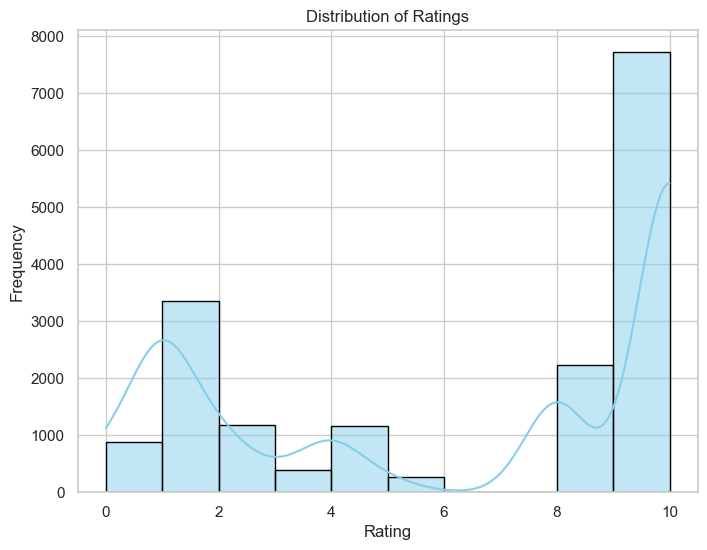

In [90]:
sns.set(style="whitegrid")

# Plot the distribution of ratings using a histogram
plt.figure(figsize=(8, 6))
sns.histplot(data['rating'], bins=range(11), kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

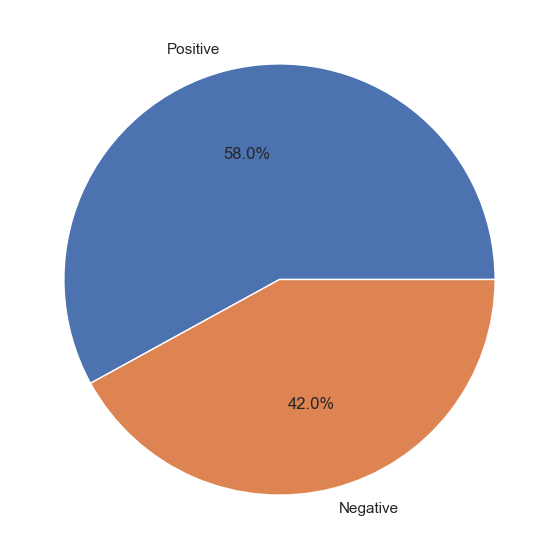

In [92]:
def ratings(rating):
    if rating>5 and rating<=10:
        return "Positive"
    if rating>=0 and rating<=5:
        return "Negative"

data['sentiment_rating'] = data['rating'].apply(ratings)
plt.pie(data['sentiment_rating'].value_counts(), labels=data['sentiment_rating'].unique().tolist(), autopct='%1.1f%%')
plt.show()

### 4. Multivariate Graphical

#### 4.1. movie_genre vs rating

<Figure size 1000x600 with 0 Axes>

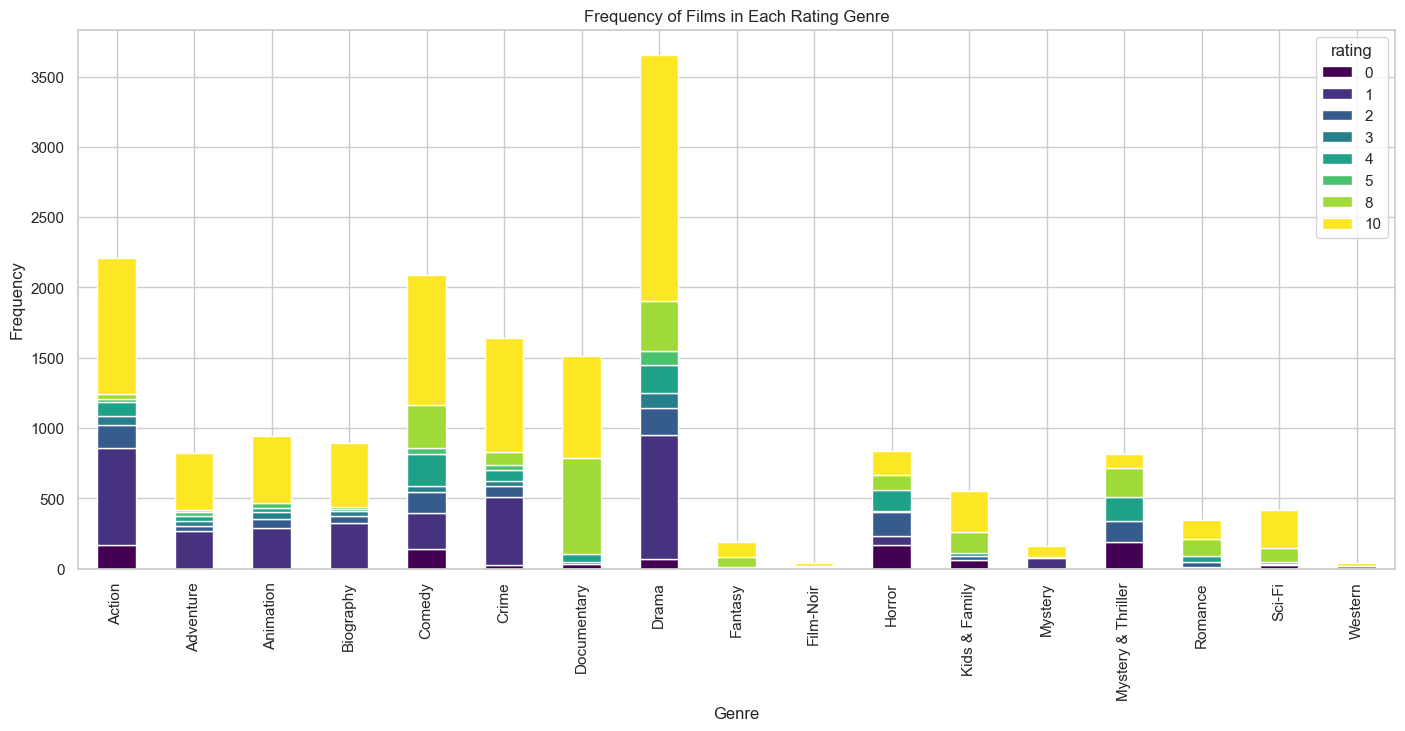

In [94]:
genre_rating_counts = data.groupby(['movie_genre', 'rating']).size().unstack(fill_value=0)

# Set the style of seaborn for better visualization (optional)
sns.set(style="whitegrid")

# Create a bar chart
plt.figure(figsize=(10, 6))
genre_rating_counts.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Frequency of Films in Each Rating Genre')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.show()

Genre Popularity Across Ratings:

You can observe which genres are more prevalent across different ratings. For instance, if a particular genre dominates high or low ratings, it suggests the audience's inclination towards that genre.
Distribution of Ratings Within Genres:

Stacked bars allow you to see the distribution of ratings within each genre. For example, in the "Action" genre, you can see how many films have different ratings. This provides a visual representation of the diversity in audience reception within each genre.
Comparative Analysis:

You can compare the popularity of genres within specific rating categories. Are certain genres more popular in higher or lower rating ranges? This comparison can help you understand the preferences of the audience for each genre.
Overall Genre Frequency:

The total height of each bar represents the overall frequency of films in each genre, regardless of the rating. This gives you an idea of the prevalence of each genre in your dataset.
Identification of Trends or Patterns:

Look for any noticeable trends or patterns in the chart. Are there specific genres that consistently receive higher or lower ratings? Are there variations in the distribution of ratings within genres?

#### 4.2. movie_duration vs rating

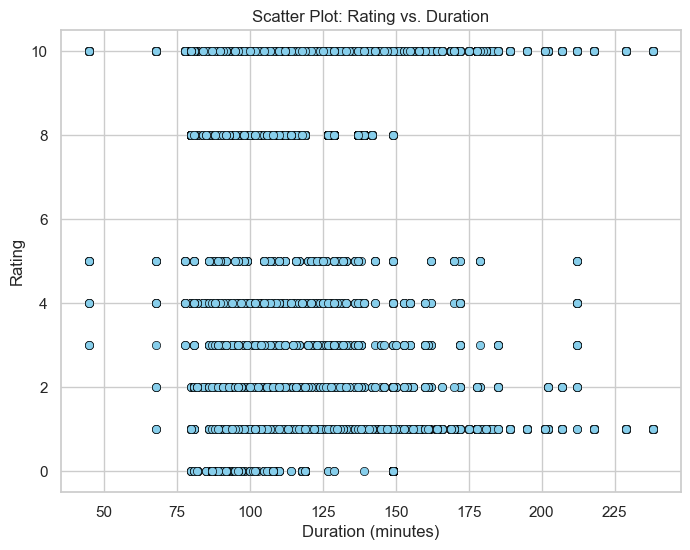

In [97]:
# Set the style of seaborn for better visualization (optional)
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='movie_duration', y='rating', data=data, color='skyblue', edgecolor='black')
plt.title('Scatter Plot: Rating vs. Duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.show()

#### 4.4. director vs genre based on rating

In [101]:
director_genre_avg_rating = data.groupby(['movie_director', 'movie_genre'])['rating'].mean().reset_index()

# Identify the director with the highest average rating for each genre
best_director_by_genre = director_genre_avg_rating.loc[director_genre_avg_rating.groupby('movie_genre')['rating'].idxmax()]

# Display the result
print("Best Director by Genre based on Average Rating:")
print(best_director_by_genre)

Best Director by Genre based on Average Rating:
       movie_director         movie_genre    rating
154  Masaki Kobayashi              Action  8.500000
39    Charles Chaplin           Adventure  8.321429
205      Ron Clements           Animation  7.540541
114      Jim Sheridan           Biography  8.370370
134         JuzoItami              Comedy  8.770053
234  Stuart Rosenberg               Crime  8.204348
210    SashaNeulinger         Documentary  9.333333
147      Majid Majidi               Drama  8.880000
105      IsaoTakahata             Fantasy  8.720430
38         Carol Reed           Film-Noir  6.100000
189        RemiWeekes              Horror  6.923077
125      JohnLasseter       Kids & Family  8.956938
13   Alfred Hitchcock             Mystery  5.562500
167      NashEdgerton  Mystery & Thriller  7.203252
89        GeorgeCukor             Romance  8.219780
110      JamesCameron              Sci-Fi  9.250000
216      Sergio Leone             Western  5.550000


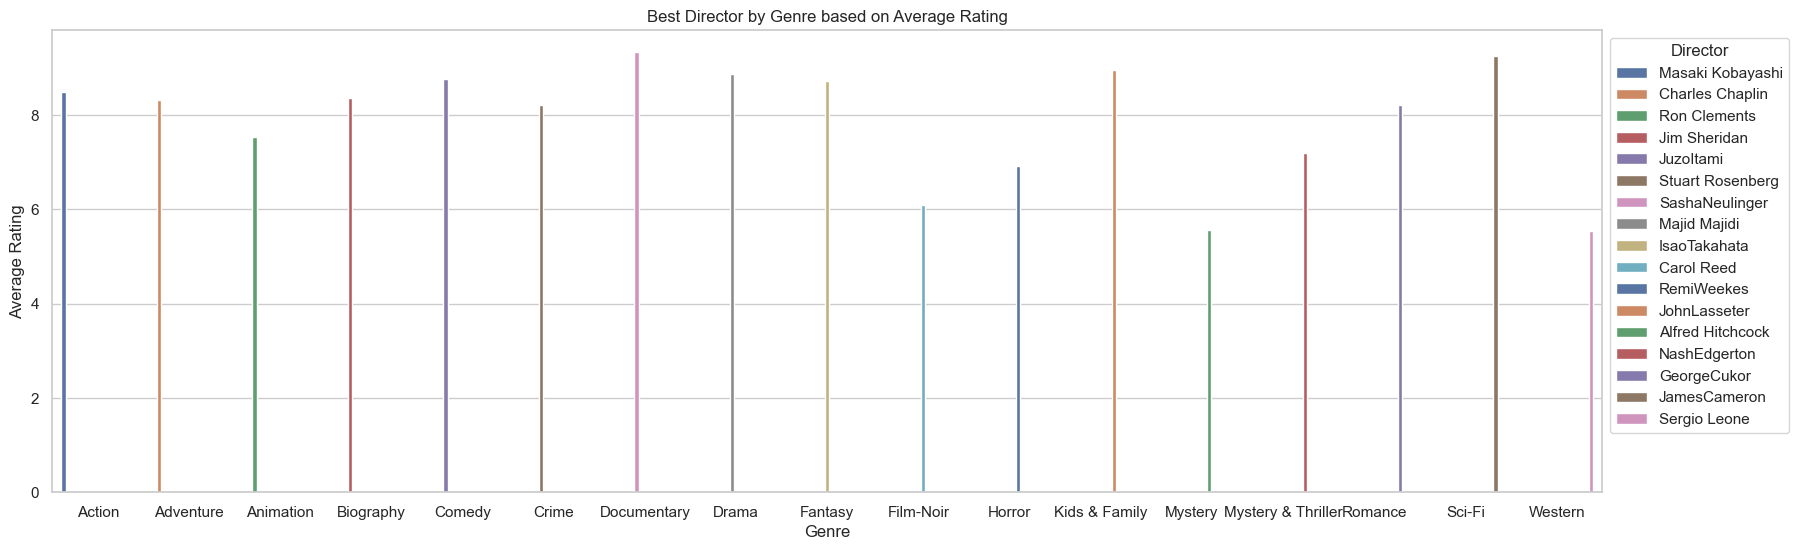

In [112]:
sns.set(style="whitegrid")

# Create a bar chart with transposed axes
plt.figure(figsize=(20, 6))
sns.barplot(x='movie_genre', y='rating', hue='movie_director', data=best_director_by_genre, palette='deep')
plt.title('Best Director by Genre based on Average Rating')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.legend(title='Director', bbox_to_anchor=(1, 1))
plt.show()